In [1]:
import pandas as pd
import numpy as np
import scipy as scy
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [2]:
file='E:\Laptop\E\Data Science\Python\Project\P2\carvan_train.csv'

#file1='E:\Laptop\E\Data Science\Python\Project\P2\carvan_test.csv'

In [3]:
train=pd.read_csv(file)

In [4]:
train.shape

(5822, 86)

In [5]:
train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [6]:
print(train.isnull().sum())

V1     0
V2     0
V3     0
V4     0
V5     0
      ..
V82    0
V83    0
V84    0
V85    0
V86    0
Length: 86, dtype: int64


In [7]:
for col in (train.columns):
    print(train[col].nunique())

40
9
5
6
10
10
10
6
10
10
8
10
10
10
10
10
10
10
10
6
10
10
10
10
10
10
10
10
9
10
10
10
8
10
10
10
10
10
10
10
8
10
8
4
7
4
6
4
6
4
6
5
5
6
10
7
3
5
9
3
7
2
7
5
3
3
2
7
5
4
4
4
5
5
3
6
2
2
3
7
2
3
4
3
3
2


In [8]:
print(train.dtypes)

V1     int64
V2     int64
V3     int64
V4     int64
V5     int64
       ...  
V82    int64
V83    int64
V84    int64
V85    int64
V86    int64
Length: 86, dtype: object


In [9]:
print(train.select_dtypes('object').columns)

Index([], dtype='object')


In [10]:
train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86'],
      dtype='object')

In [11]:
final_data=train[['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41',
       'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51',
       'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61',
       'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71',
       'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86']]

In [12]:
final_data.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
0,1,3,2,8,0,5,1,3,7,0,...,0,0,0,1,0,0,0,0,0,0
1,1,2,2,8,1,4,1,4,6,2,...,0,0,0,1,0,0,0,0,0,0
2,1,2,2,8,0,4,2,4,3,2,...,0,0,0,1,0,0,0,0,0,0
3,1,3,3,3,2,3,2,4,5,2,...,0,0,0,1,0,0,0,0,0,0
4,1,4,2,10,1,4,1,4,7,1,...,0,0,0,1,0,0,0,0,0,0


In [13]:
final_data.shape

(5822, 85)

In [14]:
for col in (final_data.columns):
    print(final_data[col].value_counts())

1     5267
2      505
3       39
7        5
4        2
10       1
6        1
5        1
8        1
Name: V2, dtype: int64
3    2646
2    2131
4     693
1     284
5      68
Name: V3, dtype: int64
3    3000
2    1452
4    1073
5     193
1      74
6      30
Name: V4, dtype: int64
8     1563
3      886
9      667
5      569
1      552
7      550
2      502
10     276
6      205
4       52
Name: V5, dtype: int64
0    3228
1    1599
2     733
3     152
4      66
5      18
6      13
7       6
9       4
8       3
Name: V6, dtype: int64
4    1607
5    1501
6     714
3     590
7     564
2     396
9     173
1     134
0      78
8      65
Name: V7, dtype: int64
1    2014
0    2003
2    1388
3     257
4     132
5      28
Name: V8, dtype: int64
3    1453
4    1334
2    1055
5     963
0     456
1     230
6     217
7     101
9       8
8       5
Name: V9, dtype: int64
7    1683
6    1172
5     946
9     794
8     361
4     324
3     246
2     157
1      75
0      64
Name: V10, dtype: int64
0    2448
1  

In [15]:
# for check correlation between variables
final_data.corr()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
V2,1.000000,0.010102,0.056975,-0.045817,-0.006136,-0.024360,0.012056,0.020540,0.023025,-0.038566,...,0.003321,0.009444,-0.016333,0.000655,-0.006189,0.000666,-0.020993,0.018304,-0.004166,-0.009809
V3,0.010102,1.000000,-0.328257,0.016115,0.013105,0.049356,-0.108650,-0.005527,0.534798,-0.175586,...,-0.000128,0.016760,0.018749,-0.009269,0.009234,0.000644,0.030330,0.025907,0.028384,0.035573
V4,0.056975,-0.328257,1.000000,0.003872,-0.037519,0.093654,0.057737,-0.119966,-0.040384,-0.307401,...,0.021070,-0.001747,0.000644,0.024417,0.000244,-0.001791,0.020612,-0.020042,-0.014540,0.004491
V5,-0.045817,0.016115,0.003872,1.000000,-0.199186,0.098493,-0.034566,-0.021466,-0.026619,-0.037509,...,0.023976,-0.010004,-0.002243,-0.012372,0.007099,-0.020683,-0.017990,-0.020997,-0.051723,-0.069300
V6,-0.006136,0.013105,-0.037519,-0.199186,1.000000,-0.372767,0.021125,-0.063904,-0.028594,0.117576,...,-0.008450,0.005386,-0.012843,0.001928,-0.000675,0.011795,-0.001503,-0.011431,-0.004009,0.006225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V82,0.000666,0.000644,-0.001791,-0.020683,0.011795,0.018468,0.009417,-0.026407,-0.001566,0.019774,...,0.023526,-0.005970,-0.004413,0.000177,0.091052,1.000000,-0.011093,0.040094,0.026325,0.105700
V83,-0.020993,0.030330,0.020612,-0.017990,-0.001503,0.001906,0.025661,-0.011122,0.020921,-0.037474,...,-0.011020,0.038345,-0.009025,-0.031095,-0.003420,-0.011093,1.000000,0.004845,0.009246,0.034144
V84,0.018304,0.025907,-0.020042,-0.020997,-0.011431,0.002392,-0.009734,0.007261,-0.003420,0.018396,...,-0.006391,0.016501,-0.005234,0.026274,0.081689,0.040094,0.004845,1.000000,0.021273,0.018026
V85,-0.004166,0.028384,-0.014540,-0.051723,-0.004009,0.016658,0.010127,-0.027291,0.036569,-0.013835,...,-0.008693,0.114810,-0.007119,0.034854,-0.002698,0.026325,0.009246,0.021273,1.000000,0.066658


In [16]:
import seaborn as sns

In [17]:
#sns.pairplot(final_data)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# correlation shown in form of heat map
corr_heat_map=final_data.corr()

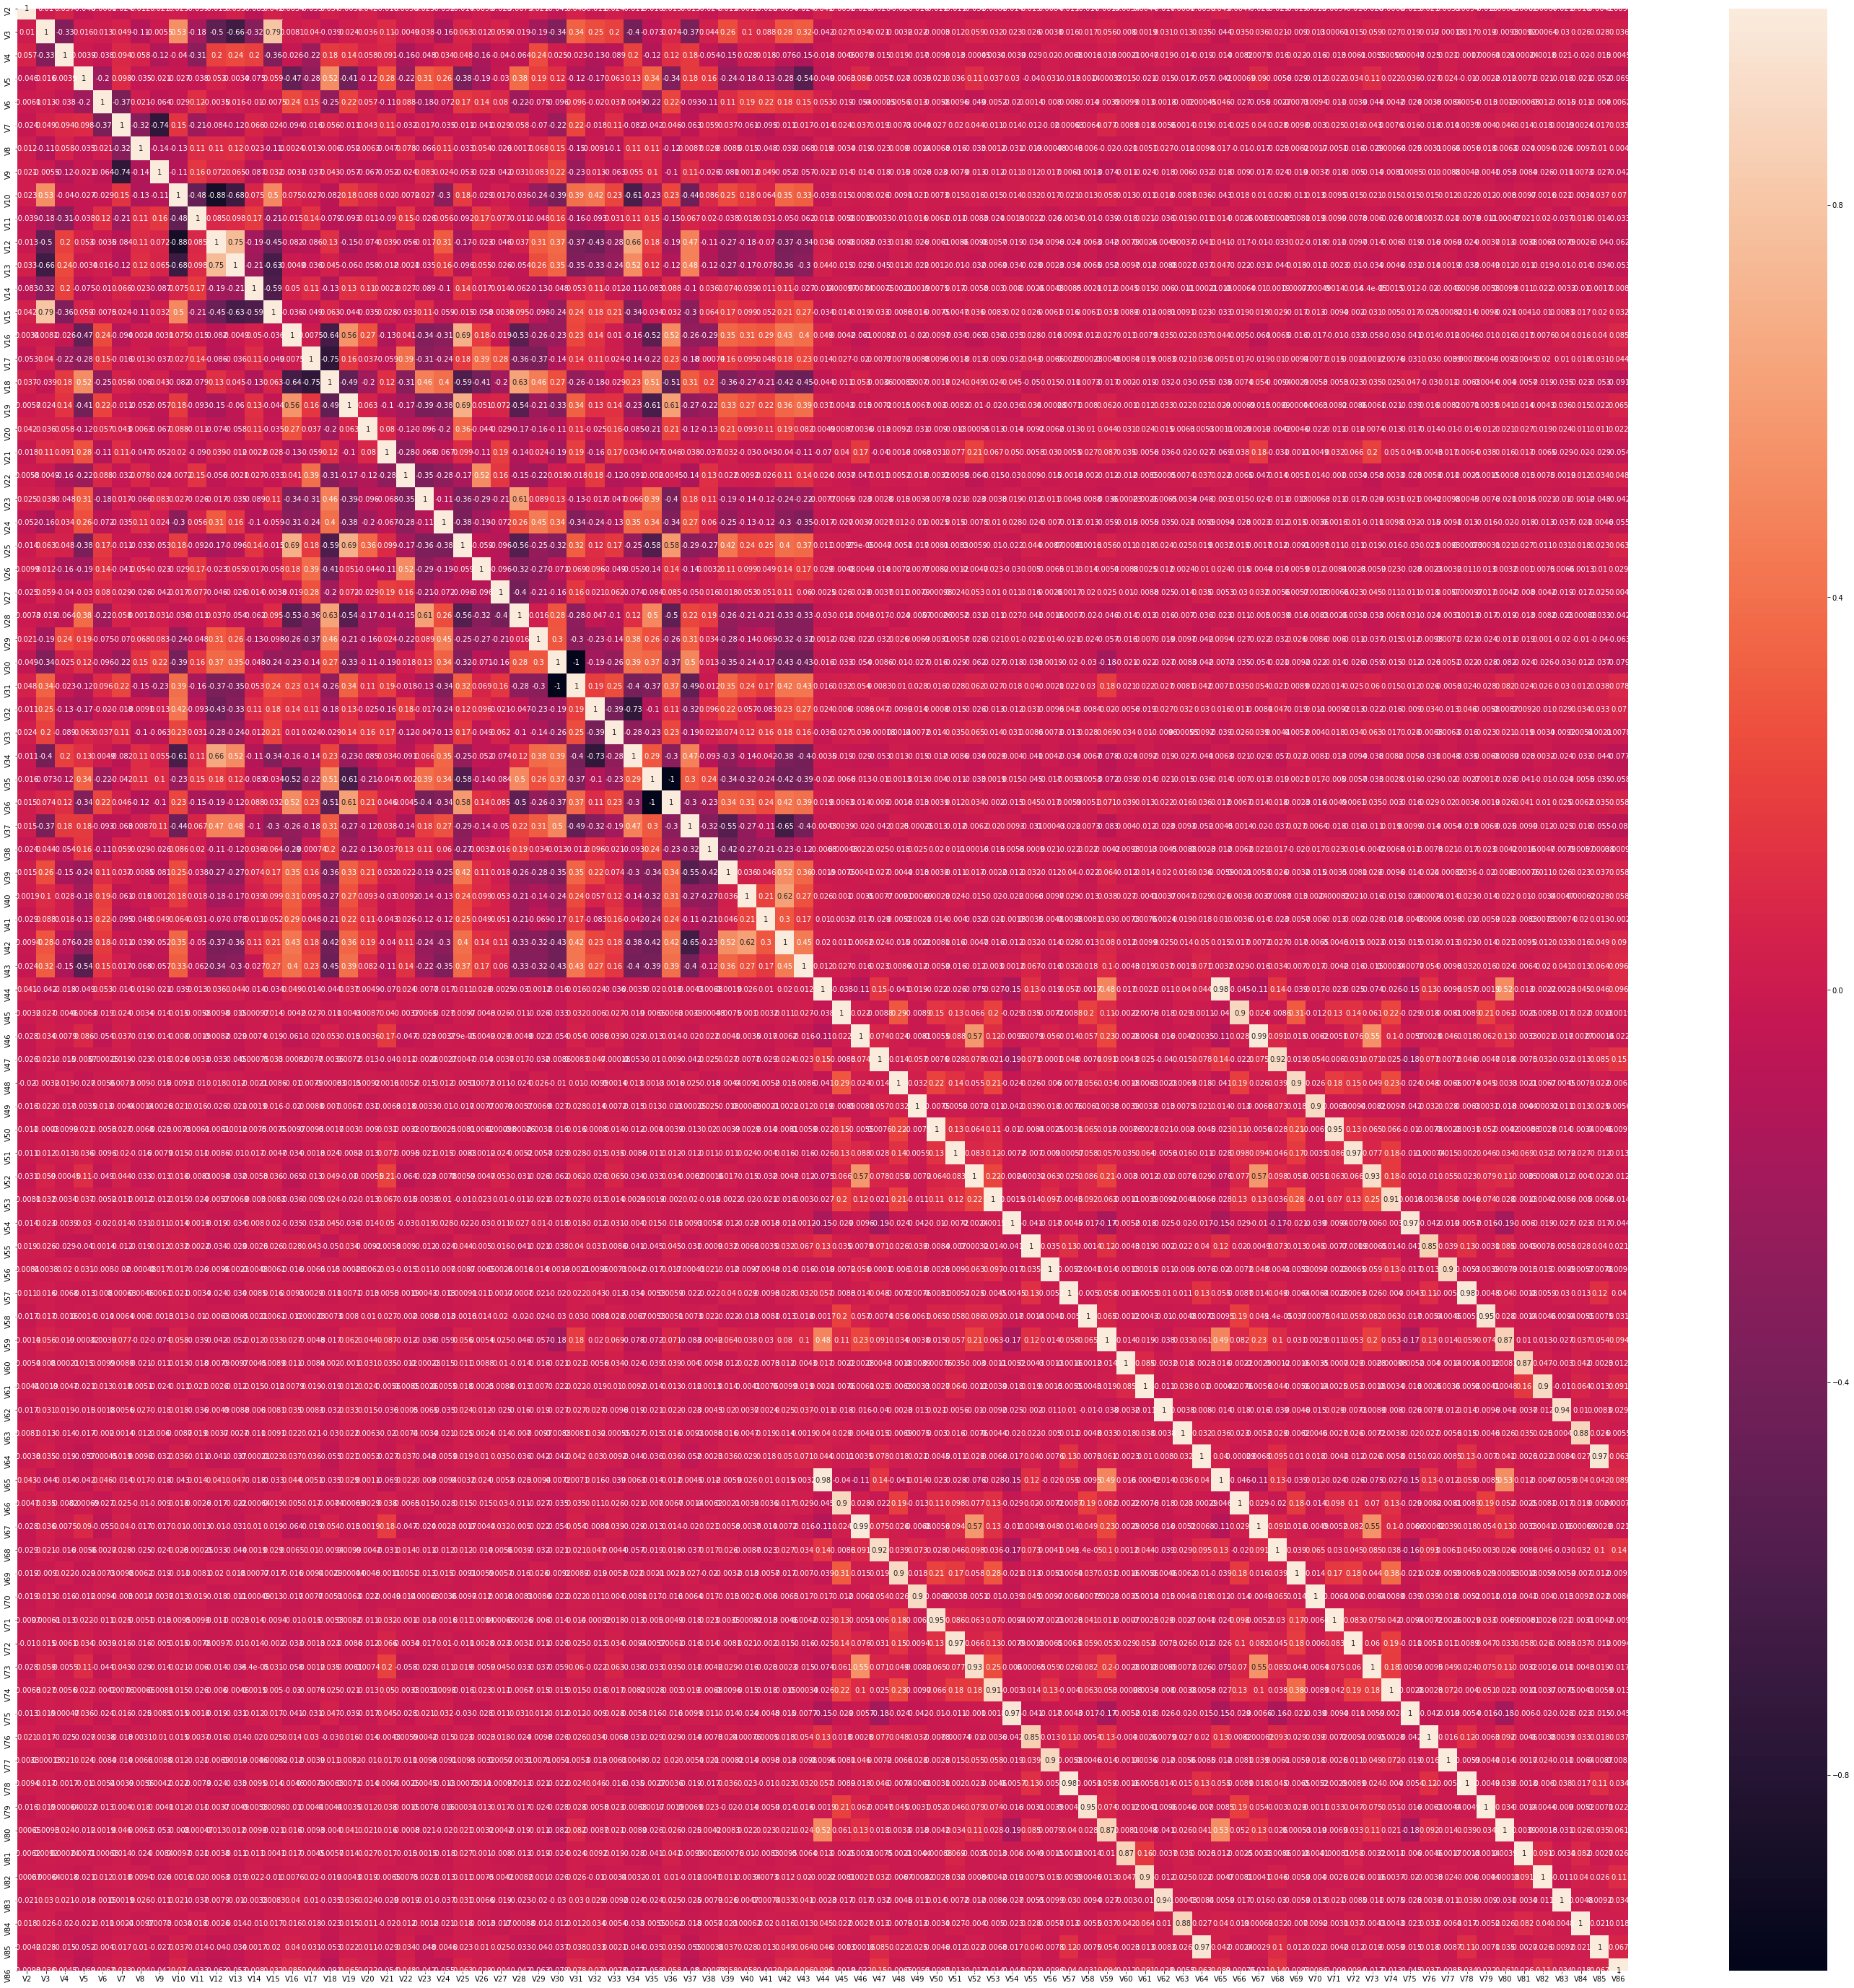

In [20]:
top_corr_features=corr_heat_map.index
plt.figure(figsize=(50,50))
#plot heat map
heat_map=sns.heatmap(final_data[top_corr_features].corr(),annot=True)

In [21]:
x=final_data.iloc[:,0:84]
y=final_data.iloc[:,84]

In [22]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: V86, dtype: int64

In [23]:
#Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

C:\Users\srs88\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [24]:
print(model.feature_importances_)

[0.00980709 0.01355272 0.01335717 0.03159089 0.01192092 0.01709896
 0.01639196 0.01470794 0.01563255 0.01107307 0.01314508 0.01651541
 0.0155428  0.01159799 0.01484633 0.01783659 0.01899093 0.01609928
 0.01471362 0.01024384 0.01737487 0.01434303 0.01741713 0.01374889
 0.0160733  0.01448173 0.01378982 0.01473108 0.00915396 0.01100814
 0.01353018 0.01366415 0.01073838 0.01328112 0.01439209 0.01755493
 0.01475184 0.01853666 0.0140227  0.00818071 0.01363035 0.03306443
 0.03306402 0.00181147 0.00060201 0.0412627  0.00076568 0.0085888
 0.         0.00409688 0.00433209 0.         0.00758926 0.01345268
 0.         0.00471253 0.00192014 0.05808303 0.00060651 0.00403542
 0.00648141 0.00384469 0.00903975 0.02681087 0.00211834 0.00068049
 0.0334021  0.00022675 0.0102292  0.         0.00129809 0.00126399
 0.         0.00613373 0.01805818 0.00016744 0.00474178 0.00260451
 0.0218011  0.00031766 0.01403004 0.0092628  0.00315936 0.00726986]


<function matplotlib.pyplot.show(*args, **kw)>

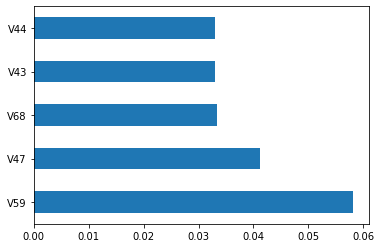

In [44]:
# plot graph of feature importances for better visualization
feature_importance=pd.Series(model.feature_importances_,index=x.columns)
# select top 10 important feature using nlargest(10)
feature_importance.nlargest(5).plot(kind='barh')
plt.show

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [27]:
x_train.shape

(4657, 84)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [29]:
logr=LogisticRegression(penalty="l1",class_weight="balanced",random_state=2)

In [30]:
logr.fit(x_train,y_train)

C:\Users\srs88\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\srs88\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
roc_auc_score(y_test,logr.predict(x_test))

0.6997716894977168

In [32]:
predictions=logr.predict(x_test)

In [33]:
predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

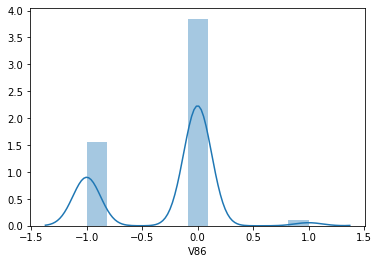

In [34]:
#check the normal distribution after fit the model
sns.distplot(y_test-predictions)

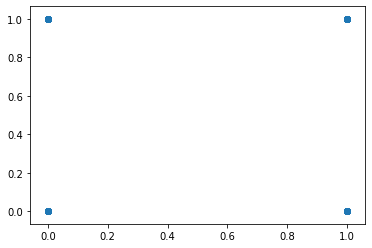

In [35]:
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.scatter(y_test, predictions)


Here we are Saving the model for deploymeny

In [42]:
import pickle

In [43]:
# open a file where you want to store the data
file=open('logistic_regression_model.pkl','wb')

#dump information to that file
pickle.dump(logr,file)

In [45]:
import joblib
joblib.dump(logr,'log_reg_model.pkl')

['log_reg_model.pkl']